# **Easy introduction to the entropy triangle and its application to Acoustic Scene Classification 🥳**

# **Part 1**: Introduction to the entropy triangle

Author of the notebook: *Claudia Montero Ramírez*

Easy explanation of the paper: *100% Classification Accuracy Considered Harmful: The Normalized Information Transfer Factor Explains the Accuracy Paradox*. 
    Francisco J. Valverde-Albacete ,
    Carmen Peláez-Moreno.
    https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0084217


Application to ASC: 


## 🧠 **Introduction and basis**

📜 **Basis**: An information transmission system could have a similar pipeline regarding to a machine learning classification problem.

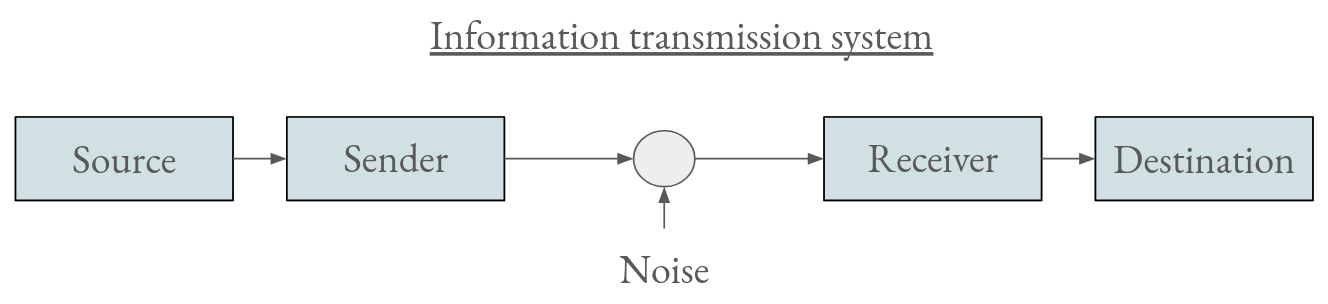

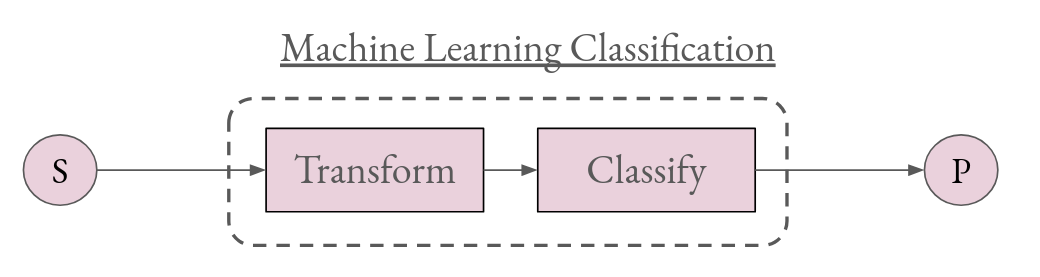

🤔 **How can we visualize the "information transmission" in a MLC problem?** 

* The **confussion matrix** includes all the information that we need!

* However... we can't see training trajectories in a simple way and at a glance. 

* The **entropy triangle** it's an easy way to visualize all this information transmission 🚀

### 🚀 **Three coordinates are all we need**

In order to understand the full confussion matrix, we just need 3 coordinates:

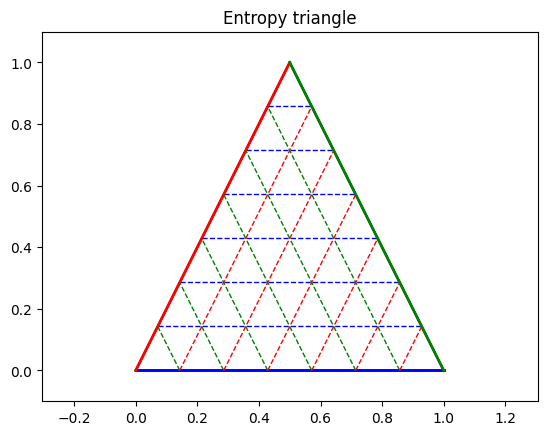

In [2]:
from src.plot_triangle import *

plot_triangle_lines()

Imagine a multiclassification problem where we have an imbalance issue 🫣

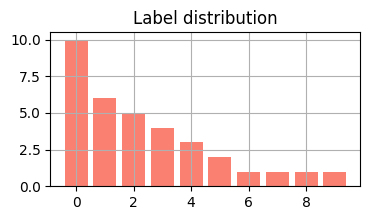

In [3]:
clases = [10, 6, 5, 4, 3, 2, 1, 1, 1, 1]

plt.figure(figsize=(4,2))
plt.bar(np.arange(10),clases, color='salmon')
plt.title('Label distribution')
plt.grid()
plt.show()

### 🟢 **Normalized Mutual Information**

This is the highest value that we can achieve regarding the normalized mutual information. It means that the transmission of information was perfect!

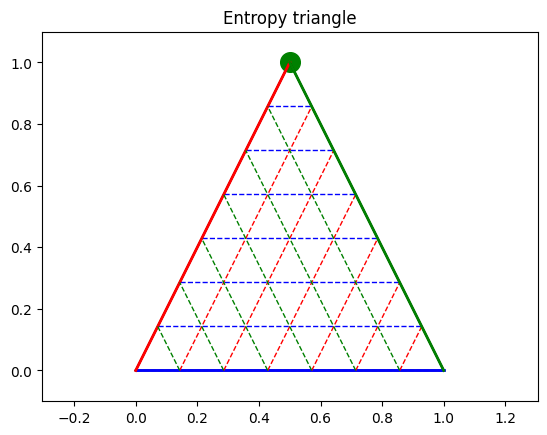

In [4]:
coordinates = [0.5, 1]
plot_coordinates(coordinates, color='green', size=200)

It corresponds to the perfect confussion matrix!!

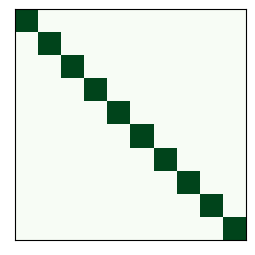

In [5]:
conf_matrix = np.eye(10)

plot_little_cm(conf_matrix, cmap = 'Greens')

### 🔴 **Normalized Variation of Information**

This is the highest value that we can achieve regarding the normalized variation of information. It means that the transmission was **completely random**!!

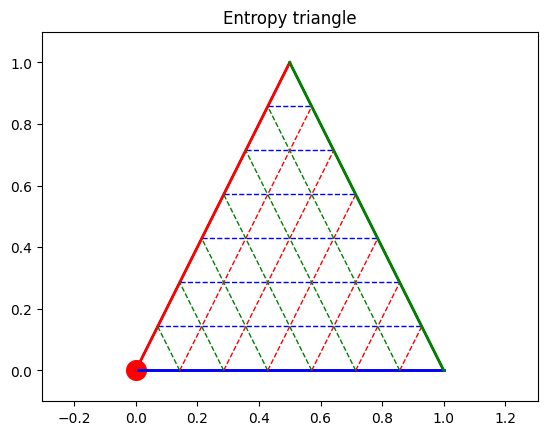

In [6]:
coordinates = [0, 0]
plot_coordinates(coordinates, color='red', size=200)

As it can be seen, the prediction is completely random!

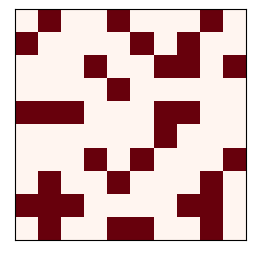

In [7]:
conf_matrix = np.random.choice([0, 1], size=(10, 10), p=[0.7, 0.3])

plot_little_cm(conf_matrix, cmap = 'Reds')

### 🔵 **Normalized Redundance or divergence with respect to the uniformity**

This is the highest value that we can achieve regarding the normalized variation of information. It means that the transmission was **completely especialized in the majority class**!!

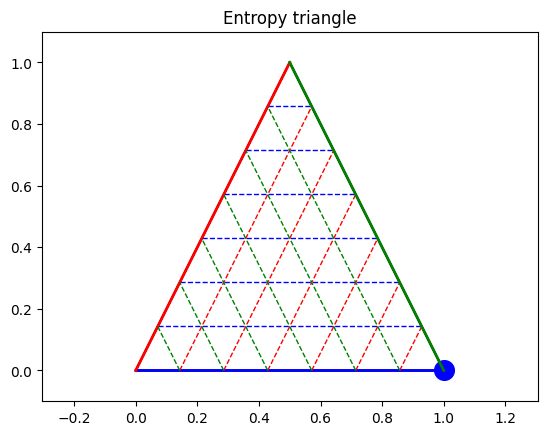

In [8]:
coordinates = [1, 0]
plot_coordinates(coordinates, color='blue', size=200)

We would achieve a high accuracy, but actually the classifier is predicting always the majority class!!

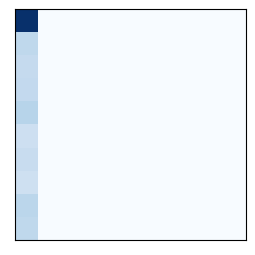

In [9]:
import random

conf_matrix = np.zeros((10, 10))

conf_matrix[0, 0] = 1

for i in range(1,10):
    conf_matrix[i, 0] = random.uniform(0.2, 0.3)

plot_little_cm(conf_matrix, cmap = 'Blues')

### ⚠️ **Important note**. 
If we are comparing different classifiers for the same dataset, this 🔴 **red** 🔴 coordinate will be always the same; as the actual labels are always the same. 

* The visualization of the entropy triangle is conditioned by the distribution of the labels in any dataset.

* For example, the ❌**real labels**❌ of a specific problem in a specific dataset, would follow that line:

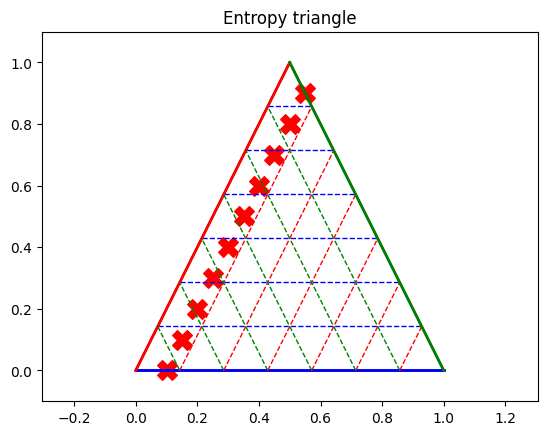

In [10]:
x_array = np.arange(0,0.6, 0.05)

plot_triangle_lines(show=False)

for i in range(len(x_array)):
    x = x_array[i]
    y = 2*x - 0.2

    if y >= 0:
        plt.scatter(x, y, color='red', s=200, marker='X')
        
plt.show()

Opposite, the 🔴**predicted labels**🔴 can have different distributiosn, and not follow that line:

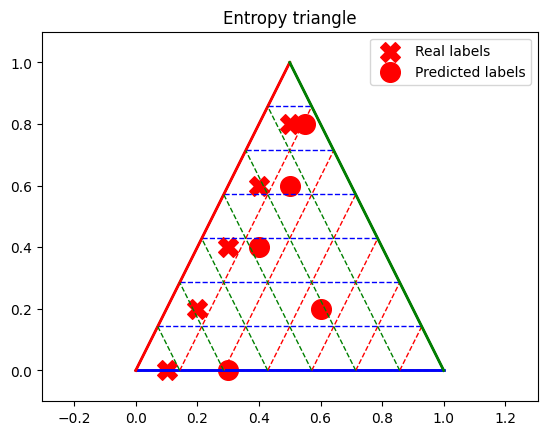

In [11]:
x1_array = np.arange(0,0.6, 0.1)

x2_bias = [0.1, 0.2, 0.4, 0.1, 0.1, 0.05]

plot_triangle_lines(show=False)

for i in range(len(x1_array)):
    x1 = x1_array[i]
    y1 = 2*x1 - 0.2

    x2 = x1 + x2_bias[i]

    # Solo añade la etiqueta en la primera iteración
    label_real = 'Real labels' if i == 0 else None
    label_pred = 'Predicted labels' if i == 0 else None
  
    plt.scatter(x1, y1, color='red', s=200, marker='X', label=label_real)
    plt.scatter(x2, y1, color='red', s=200, marker='o', label=label_pred)

plt.legend()
plt.show()

Each pair ❌**real labels**❌ - 🔴**predicted labels**🔴, correspond to one confussion matrix obtained trought the prediction on the same dataset. 

As it can be seen, they both always have the same heigth in terms of 🟢 **Mutual Information**, because it contains a joint probability between real and predicted labels.

## 🩺 **Theory**


Let $N_{X,Y}$ be a confussion matrix. Let $X \sim P(x)$ be the distribution of the actual labels and $Y \sim P(y)$ the one of the predicted labels.

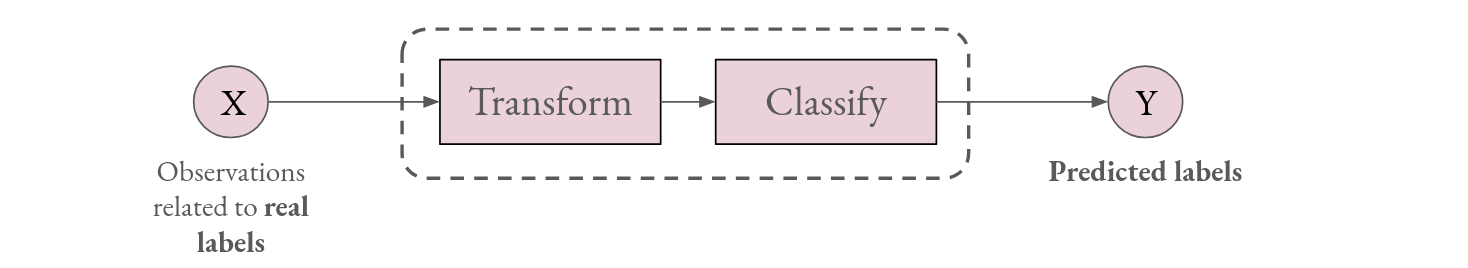

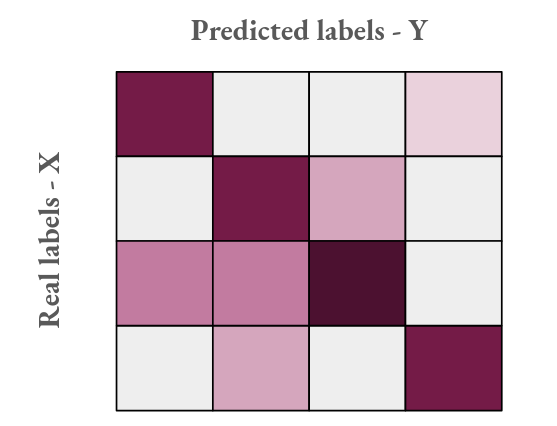


We can visualize any confussion matrix using the entropy triangle framework by calculating three coordinates:

\begin{equation}

H_{U_{X} \cdot U_{Y}} = \Delta H_{P_{X} \cdot P_{Y}} + 2 \cdot MI_{P_{XY}} + VI_{P_{XY}}
\end{equation}

We need to normalize it:

\begin{equation}
1 = \Delta H'_{P_{X} \cdot P_{Y}} + 2 \cdot MI'_{P_{XY}} + VI'_{P_{XY}}
\end{equation}

Then, the entropic triangle has 3 edges:

* 🔵 **Normalized Redundance or divergence with respect to the uniformity**: $\Delta H'_{P_{X} \cdot P_{Y}} = [\Delta H'_{P_{X}}, \Delta H'_{P_{Y}}]$
* 🔴 **Normalized Variation of Information**: $ VI'_{P_{XY}} = [H'_{P_{X|Y}}, H'_{P_{Y|X}}]$
* 🟢 **Normalized Mutual Information**: $2 \cdot MI'_{P_{XY}}$

## 📜 **Practical case**: Plot any confussion matrix into the entropic triangle

Let be the following confussion matrix. It has a perfect diagonal, but it's influenced by an imbalanced dataset.

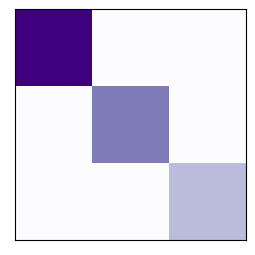

In [12]:
cm = np.array([[8, 0, 0], [0,5,0], [0, 0, 3]])
plot_little_cm(cm, cmap = 'Purples')

Let's calculate the three coordinates and normalize them. We have:

* For the real labels:  
\begin{equation}
x := [\Delta H'_{P_{X}},  2 \cdot MI'_{P_{XY}}, H'_{P_{X|Y}} ]
\end{equation}
* For the predicted labels: 
\begin{equation}
y := [\Delta H'_{P_{Y}},  2 \cdot MI'_{P_{XY}}, H'_{P_{Y|X}} ]
\end{equation}


{'x': [0.06797984129570853, 0.9320201587042914, -0.0], 'y': [0.06797984129570853, 0.9320201587042914, -0.0]}


/home/cmramirez/Desktop/Python/PAPER INTERSPEECH 2025/interspeech_github/notebooks/information_theory.py:40: RuntimeWarning: divide by zero encountered in log2
  oper = C_prob[i,j] * np.log2(C_prob[i,j])
/home/cmramirez/Desktop/Python/PAPER INTERSPEECH 2025/interspeech_github/notebooks/information_theory.py:40: RuntimeWarning: invalid value encountered in double_scalars
  oper = C_prob[i,j] * np.log2(C_prob[i,j])
/home/cmramirez/Desktop/Python/PAPER INTERSPEECH 2025/interspeech_github/notebooks/information_theory.py:88: RuntimeWarning: divide by zero encountered in log2
  oper_x = C_prob[i,j] * np.log2((C_prob[i,j])/marginals_y[j])
/home/cmramirez/Desktop/Python/PAPER INTERSPEECH 2025/interspeech_github/notebooks/information_theory.py:88: RuntimeWarning: invalid value encountered in double_scalars
  oper_x = C_prob[i,j] * np.log2((C_prob[i,j])/marginals_y[j])
/home/cmramirez/Desktop/Python/PAPER INTERSPEECH 2025/interspeech_github/notebooks/information_theory.py:89: RuntimeWarning: div

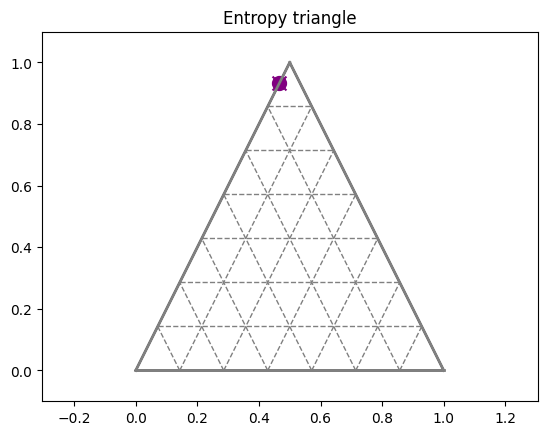

In [13]:
from src.information_theory import *

metrics = calculate_everything(cm, normalize=True)
print(metrics)
plot_double_coordinates(metrics, color='purple', size=100)

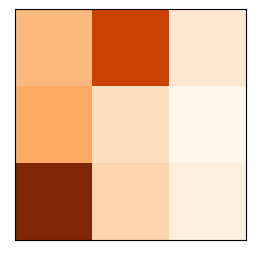

{'x': [0.028801998830397732, 0.06526176539099894, 0.9059362357786035], 'y': [0.11673178688207136, 0.06526176539099894, 0.8180064477269299]}


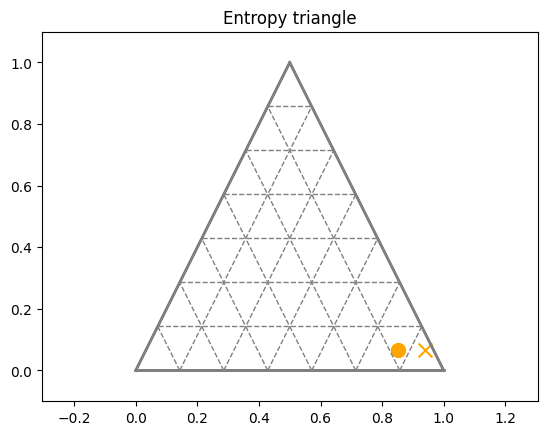

In [14]:
cm = np.array([[8, 16, 4], [9,5,2], [20, 6, 3]])
plot_little_cm(cm, cmap = 'Oranges')

metrics = calculate_everything(cm, normalize=True)
print(metrics)
plot_double_coordinates(metrics, color='orange', size=100)


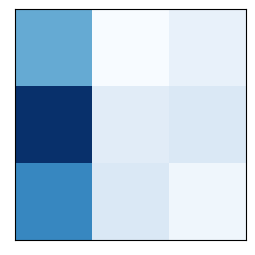

{'x': [0.026959029137700315, 0.009581758340009862, 0.9634592125222898], 'y': [0.27516590849424005, 0.009581758340009862, 0.7152523331657501]}


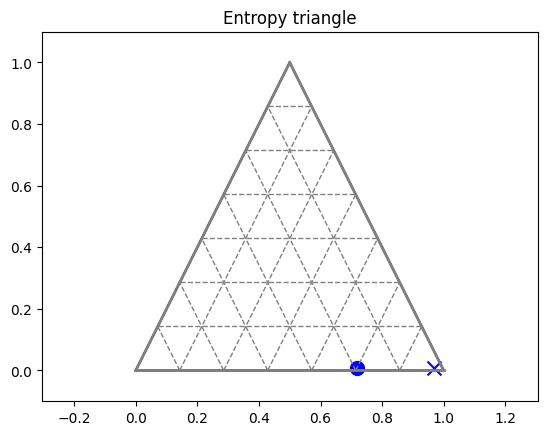

In [15]:
cm = np.array([[16, 2, 4], [29,5,6], [20, 6, 3]])
plot_little_cm(cm, cmap = 'Blues')

metrics = calculate_everything(cm, normalize=True)
print(metrics)
plot_double_coordinates(metrics, color='blue', size=100)


🤗 Now you have understood the entropy triangle framework!! Continue with the **Part 2** for more information about our work 

# 🌐 **Application to Acoustic Scene Classification**

All **Audio Tagging problems exhibit a highly imbalanced nature**. In our daily lives, we usually spent much more time in some places than in others - such as Home or Work, rather than in the airport - (ASC), or even we listen some acoustic events more than others - Silence rather than Speech - (SED). 

🔺 That's why is crucial to analyze the behaviour of class balancing methods through the framework of the entropy triangle.